### Pong - Reinforcement Learning

If you run this notebook on a remote AWS EC2 GPU server you first need to install the xvfb package. Assuming the server is running Ubuntu 18.04 you can do this with:

    sudo apt-get update -y  
    sudo apt-get install -y xvfb

Then start a screen session with the command:

    screen

This will prevent the notebook from exiting if your ssh session disconnects. Once in the screen session start your notebook with:

    xvfb-run -s "-screen 0 1400x900x24" jupyter notebook --no-browser

On a G4 server with Tesla T4 GPU and updated nvidia drivers the notebook should run without problems. However on older OS you could run into plenty of trouble related to "headless" rendering of opengl.

In [1]:
import sys
import os

In [2]:
p0 = os.path.abspath('.')
p1 = os.path.abspath(os.path.join(p0, '..'))

sys.path.insert(0, p1)

In [3]:
import jupylet.rl

In [4]:
import PIL.Image

import numpy as np

In [5]:
%time pong = jupylet.rl.GameProcess('pong')

CPU times: user 3.26 ms, sys: 0 ns, total: 3.26 ms
Wall time: 2.43 ms


In [6]:
%time pong.start()

CPU times: user 5.71 ms, sys: 5.79 ms, total: 11.5 ms
Wall time: 834 ms


In [7]:
%timeit -n100 _ = pong.step()

2.41 ms ± 204 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


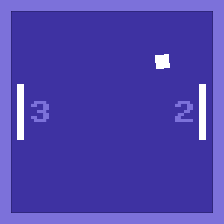

In [8]:
PIL.Image.fromarray(pong.step())

In [9]:
%timeit -n100 pong.get('WIDTH')

68.7 µs ± 2.79 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
games = jupylet.rl.Games(['pong'] * 4)

In [11]:
%time games.start()

CPU times: user 1.02 ms, sys: 13.7 ms, total: 14.7 ms
Wall time: 805 ms


In [12]:
%timeit -n100 games.step()

3.14 ms ± 174 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%time al = games.step()

CPU times: user 839 µs, sys: 840 µs, total: 1.68 ms
Wall time: 2.99 ms


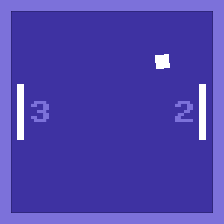

In [14]:
PIL.Image.fromarray(al[0])

In [15]:
batch = np.stack(al, 0).transpose(0, 3, 1, 2)
batch.shape

(4, 3, 224, 224)